# 了解图片集的相关信息(Get some insight of the image dataset)

## 选择图片集(Choose image dataset of interest)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import os
from os.path import isfile
import ipywidgets as widgets
from IPython.display import display
import numpy as np

In [2]:
cwd = os.getcwd()
dataset_list = ['']
dataset_parent_dir = os.path.join(cwd, "raw_datasets/images/")
if dataset_parent_dir.endswith('/'):
    dataset_parent_dir = dataset_parent_dir[:-1]
if os.path.exists(dataset_parent_dir):
    dataset_names = os.listdir(dataset_parent_dir)
    for dataset in dataset_names:
        dataset_list.append(dataset)
else:
    print("Error: " + dataset_parent_dir + " does not exist!\n" + "Please try again!")

In [3]:
dataset_dropdown = widgets.Dropdown(options=dataset_list, value='', description='选择图片集：', disabled=False)
display(dataset_dropdown)

Dropdown(description='选择图片集：', options=('', 'plantVillage'), value='')

In [4]:
if dataset_dropdown.value:
    dataset_path = os.path.join(dataset_parent_dir, dataset_dropdown.value)
    print("The absolute path of your chosen dataset is " + dataset_path + ".")
else:
    dataset_path = ''
    print("Warning: You did not choose any dataset.")

The absolute path of your chosen dataset is /home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage.


## 读取记录了重复图片的文本（如果存在）(If it is available, read the file recording duplicated images)

In [5]:
folder_name = []
ignored_image = []
ignored_image_absolute_path = []
if isfile(cwd + "/" + "processed_datasets/plantVillage/" + "duplicates.txt"):
    with open(cwd + "/" + "processed_datasets/plantVillage/" + "duplicates.txt", 'rt') as f:
        duplicate_info = f.read().split('\n')[:-1]
        for line in duplicate_info:
            duplicated_image = line.strip().split('\t')[1]
            kept_image = line.strip().split('\t')[2]
            for item in duplicated_image.split(','):
                if item != kept_image:
                    ignored_image.append(item)
                    folder_name.append(line.strip().split('\t')[0])

    print("The duplicated images to be ignored:")                    
    for folder, image in zip(folder_name, ignored_image):
        ignored_image_absolute_path.append(dataset_path + "/" + folder + "/" + image)
    
    print('\n'.join(ignored_image_absolute_path))
else:
    print("duplicates.txt does not exist. Please generate this file first by codes in 1.4.")

The duplicated images to be ignored:
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 1216.JPG
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 1136.JPG
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 0095.JPG
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 9992.JPG
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 9852.JPG
/home/gxty/pycharmProjects/plant_disease_detection_project/raw_datasets/images/plantVillage/Orange___Haunglongbing_(Citrus_greening)/UF.Citrus_HLB_Lab 1042.JPG
/ho

## 图片集所含类别及每类的图片数目(Show category list and the corresponding image numbers)

In [6]:
category_list = []
class_list = []
category_species_list = []
image_number_list = [0]
label_list = [-1]
total_image_number = 0

if os.path.exists(dataset_path):
    category_names = os.listdir(dataset_path)
    for category in category_names:
        category_path = os.path.join(dataset_path, category)
        image_number_of_category = len([name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name)) and 
                                                         (category_path + '/' + name) not in ignored_image_absolute_path])
        total_image_number += image_number_of_category
        category_list.append(category + '\t' + str(image_number_of_category))
    
    category_list.sort()
    
    for i in range(len(category_list)):
        image_number_list.append(int(category_list[i].split('\t')[1]))
        label_list.append(i)
        class_list.append(category_list[i].split('\t')[0])
        category_species_list.append(category_list[i].split('\t')[0].split('_')[0])
        category_list[i] = str(i) + '\t' + category_list[i]
        
    with open(cwd + "/" + "processed_datasets/"+ dataset_dropdown.value + "/80-20/" + "class.txt", 'w') as f:
        f.write("\n".join(class_list))
        f.write("\n")
    print("The class.txt file is under" + cwd + "/" + "processed_datasets/"+ dataset_dropdown.value + "/80-20/.")
        
    mean_image_number = np.mean(image_number_list[1:]).round()
    min_image_number = np.min(image_number_list[1:]).round()
    max_image_number = np.max(image_number_list[1:]).round()
    
    print("There are "+ str(len(category_list)) + " classes (" + str(total_image_number) + " images) in your dataset ("
          + "mean number=" + str(mean_image_number) + ", " 
          + "min number=" + str(min_image_number) + ", " 
          + "max number=" + str(max_image_number) + "):\n" 
          + "Label" + "\t" + "Class" + "\t\t\t" + "Image number\n"
          + '\n'.join(category_list))

else:
    print("Warning: You did not choose any dataset.\n" + "Please try again!")

The class.txt file is under/home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.
There are 38 classes (54272 images) in your dataset (mean number=1428.0, min number=152, max number=5501):
Label	Class			Image number
0	Apple___Apple_scab	630
1	Apple___Black_rot	621
2	Apple___Cedar_apple_rust	275
3	Apple___healthy	1638
4	Blueberry___healthy	1502
5	Cherry_(including_sour)___Powdery_mildew	1050
6	Cherry_(including_sour)___healthy	854
7	Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot	513
8	Corn_(maize)___Common_rust_	1192
9	Corn_(maize)___Northern_Leaf_Blight	985
10	Corn_(maize)___healthy	1161
11	Grape___Black_rot	1180
12	Grape___Esca_(Black_Measles)	1383
13	Grape___Leaf_blight_(Isariopsis_Leaf_Spot)	1076
14	Grape___healthy	423
15	Orange___Haunglongbing_(Citrus_greening)	5501
16	Peach___Bacterial_spot	2297
17	Peach___healthy	360
18	Pepper,_bell___Bacterial_spot	997
19	Pepper,_bell___healthy	1478
20	Potato___Early_blight	1000
21	Potato___Late_bl

In [7]:
color_set = {'green', 'blue'}
color_specific = {'blue'}
color_list = []
color_list.append('white')
color_list.append(list(color_set & color_specific)[0])
category_species_unique_list = []
category_species_unique_list.append(category_species_list[0])

for i in range(1, len(category_species_list), 1):
    if category_species_list[i] == category_species_list[i-1]:
        color_list.append(list(color_set & color_specific)[0])
    else:
        category_species_unique_list.append(category_species_list[i])
        color_different = color_set - color_specific
        color_specific.remove(list(color_set & color_specific)[0])
        color_specific.add(list(color_different)[0])
        color_list.append(list(color_set & color_specific)[0])

del color_set
del color_specific

14 species in total: Apple, Blueberry, Cherry, Corn, Grape, Orange, Peach, Pepper,, Potato, Raspberry, Soybean, Squash, Strawberry, Tomato


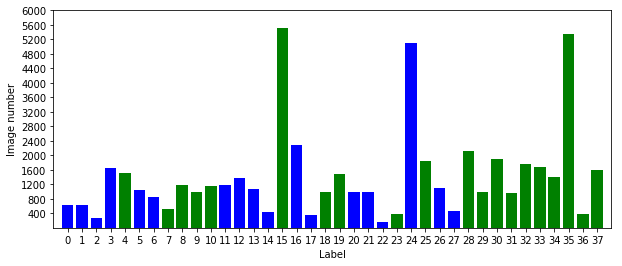

In [8]:
print(str(len(category_species_unique_list)) +  " species in total: " + ', '.join(category_species_unique_list))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1, len(image_number_list)-1)
ax.set_ylim(0, max_image_number+500)
my_x_ticks = label_list[1:]
my_y_ticks = np.arange(400, 6400, 400)
ax.set_xticks(my_x_ticks)
ax.set_yticks(my_y_ticks)
ax.set_xlabel("Label")
ax.set_ylabel("Image number")
ax.bar(label_list, image_number_list, align='center', color=color_list)
plt.show()

## 查找并记录图片集中的重复图片(Search and record duplicated images in the chosen dataset)

In [9]:
from os.path import isfile
from PIL import Image as pil_image
from tqdm import tqdm_notebook
import pickle
import numpy as np
from imagehash import phash
from math import sqrt
import shutil

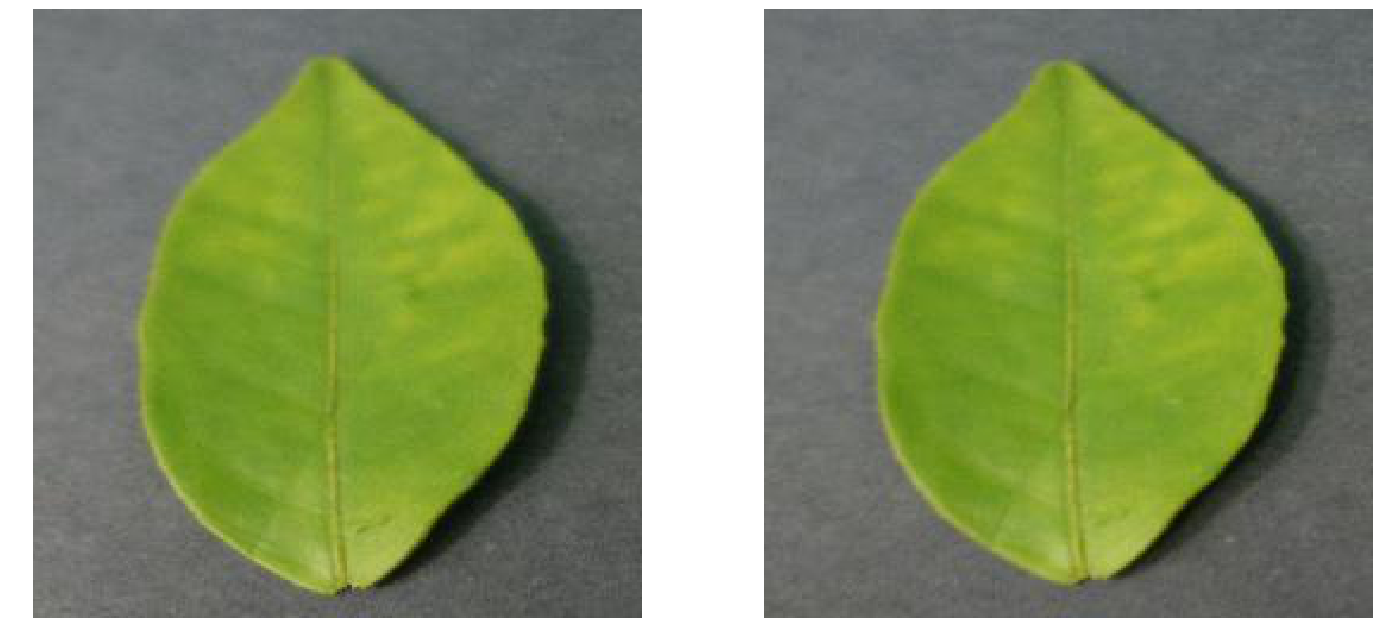

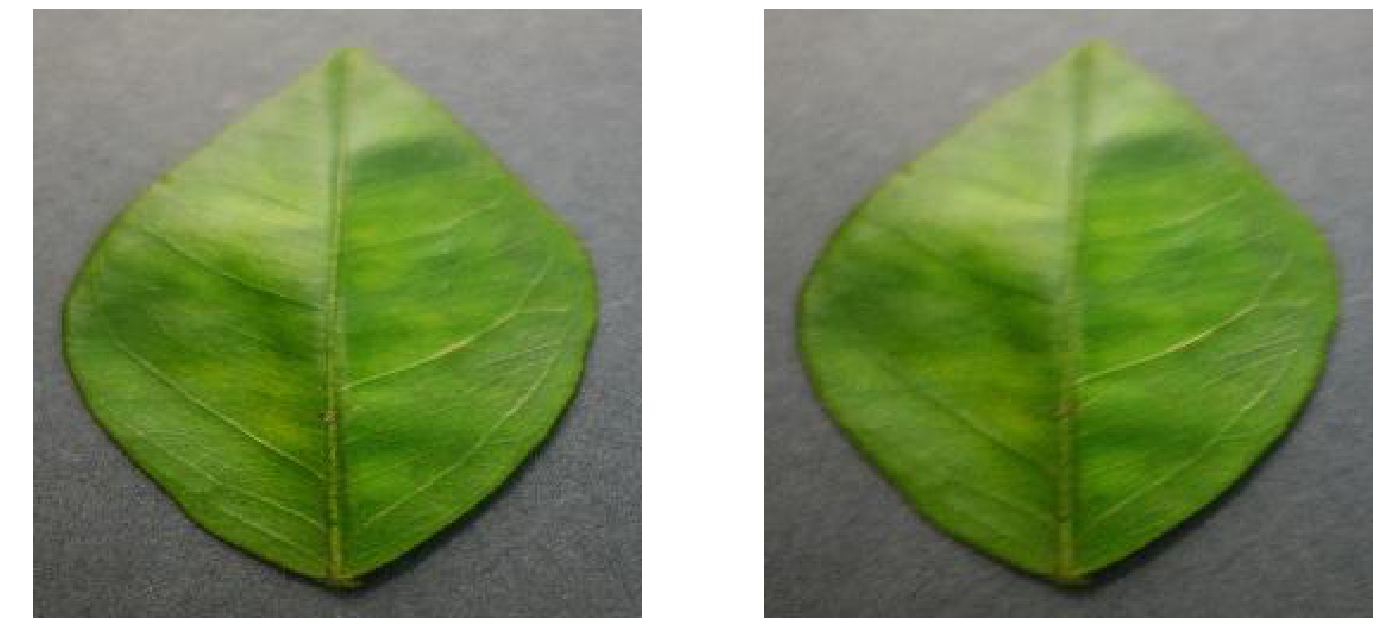

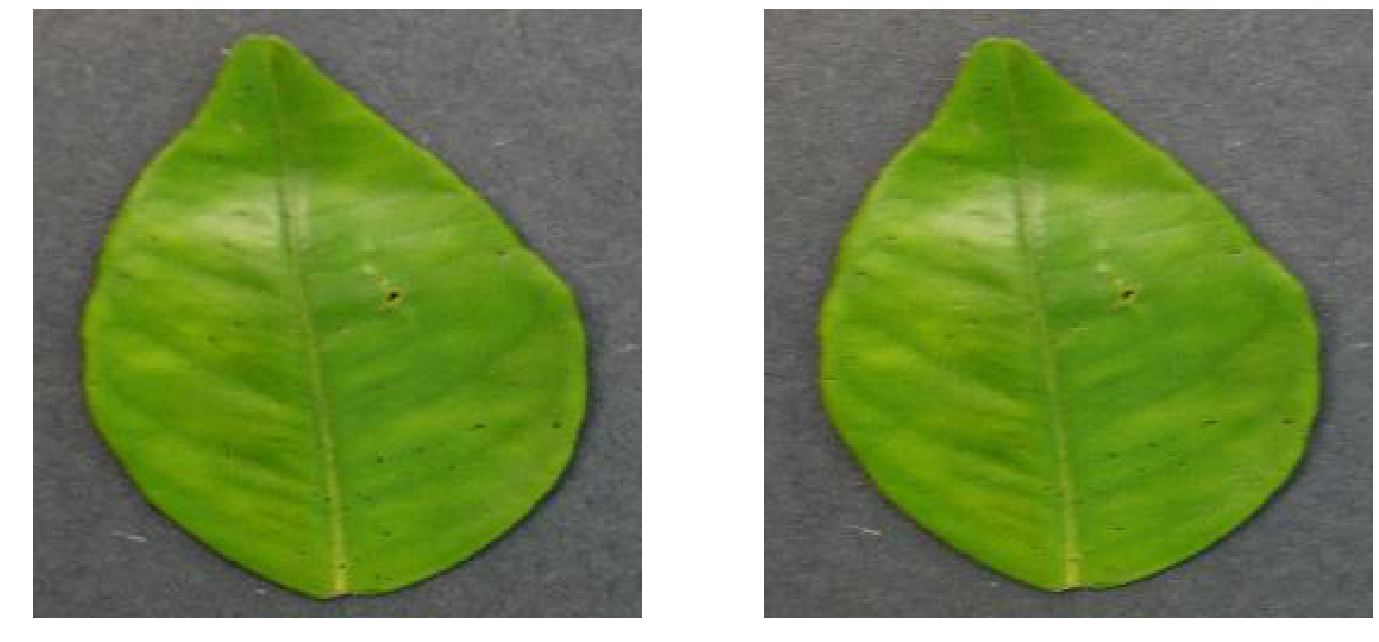

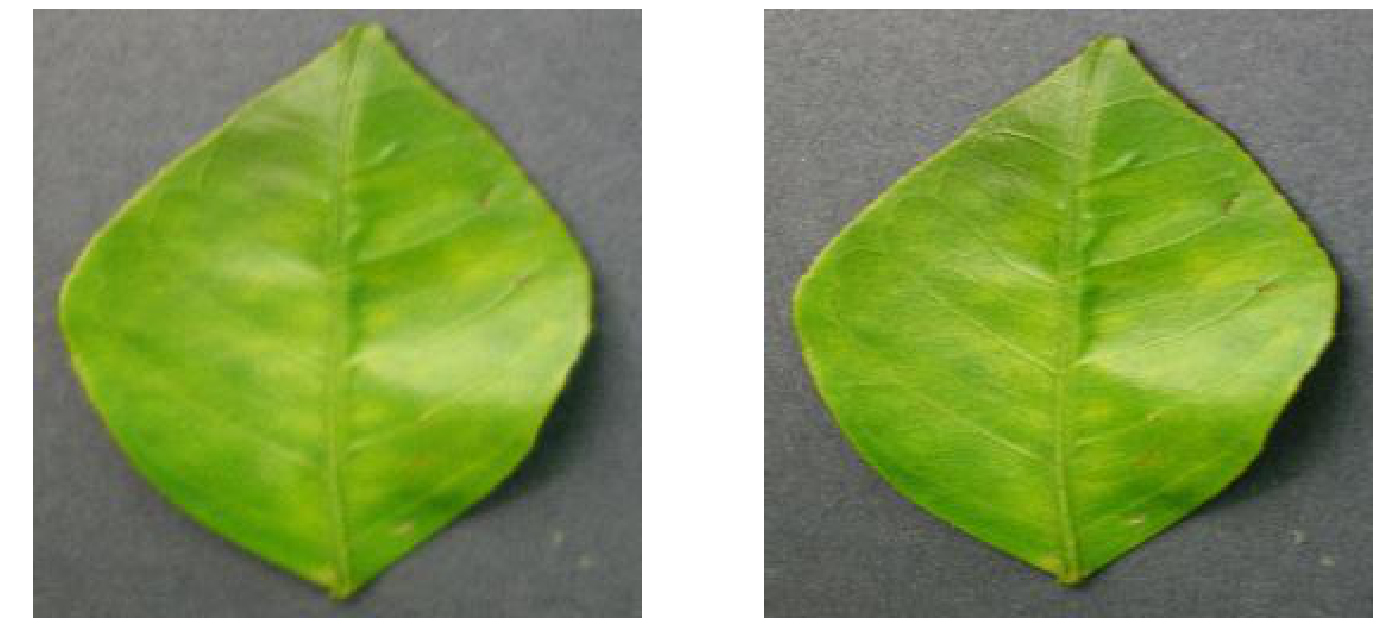

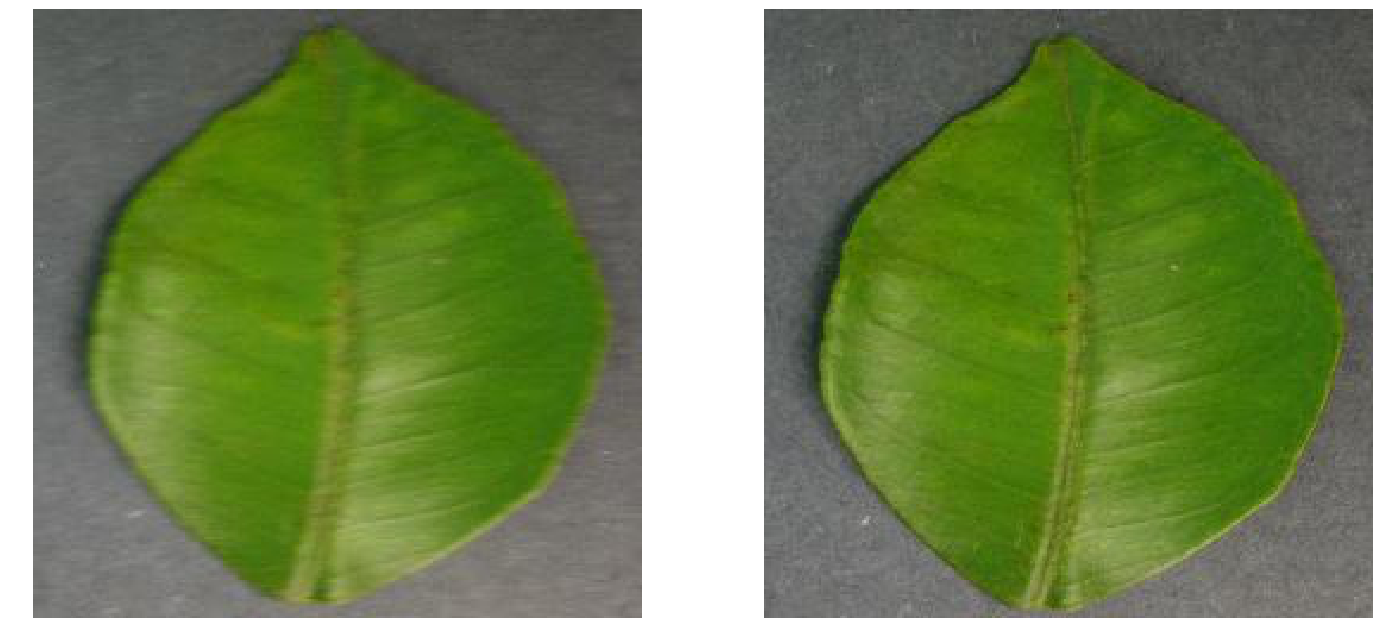

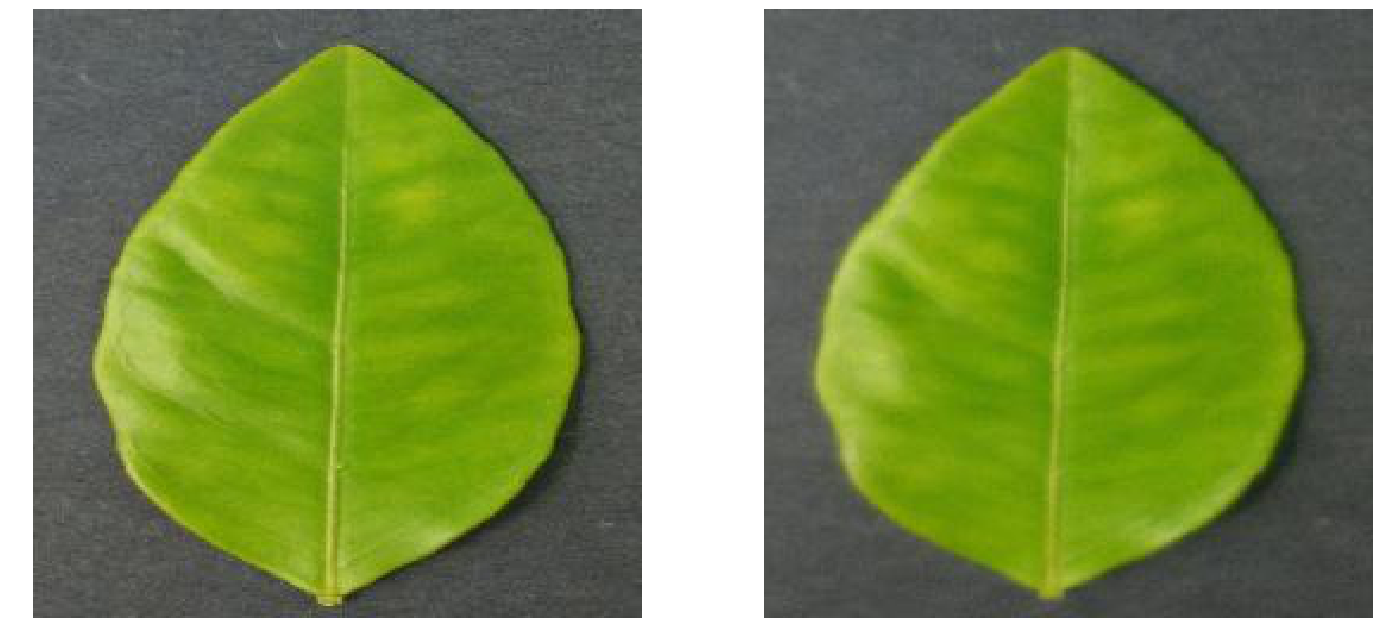

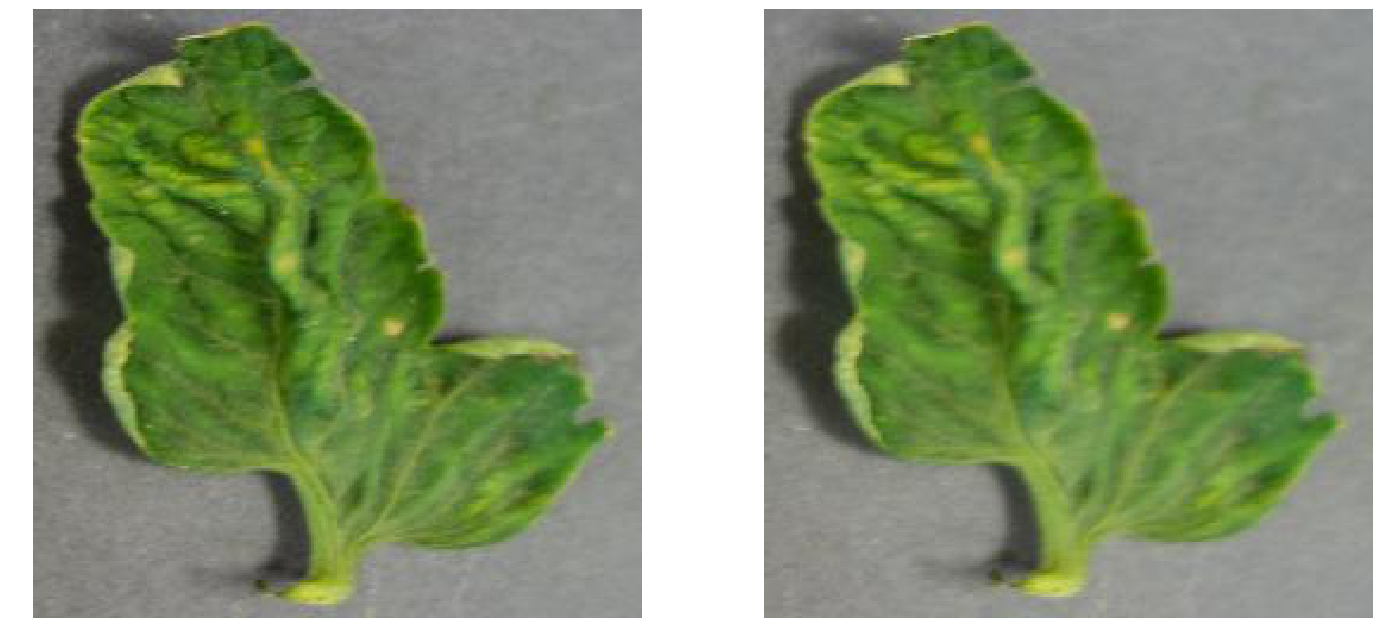

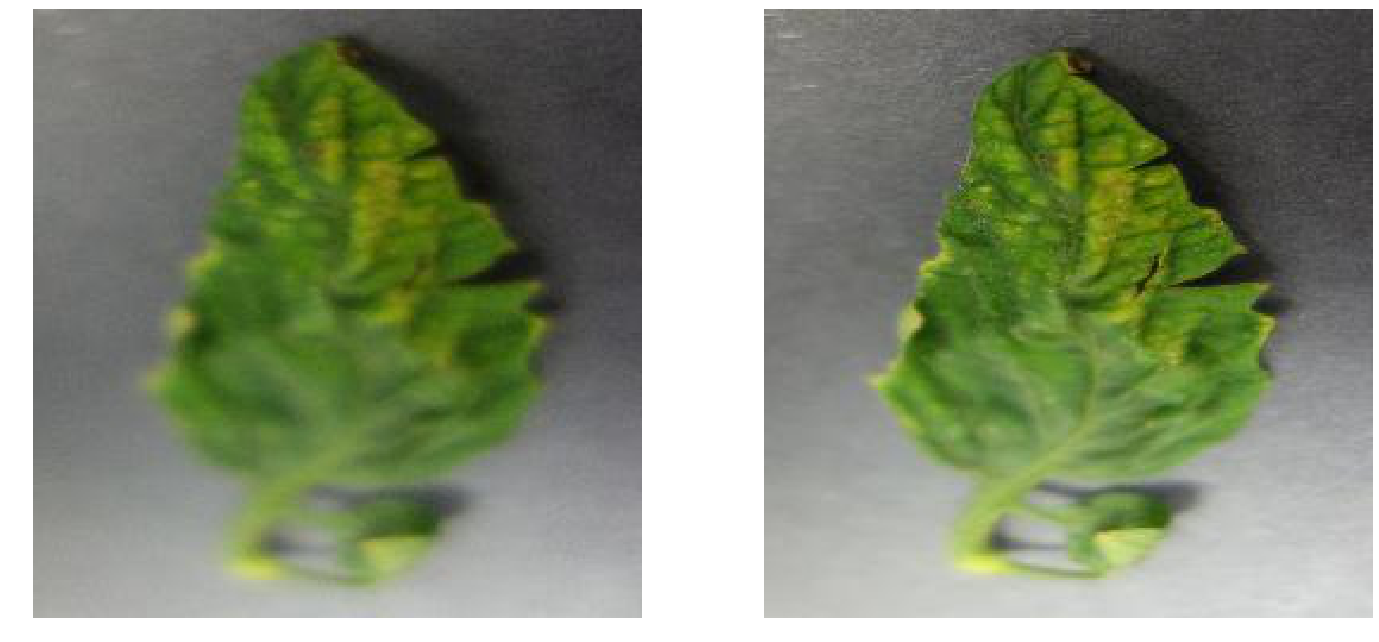

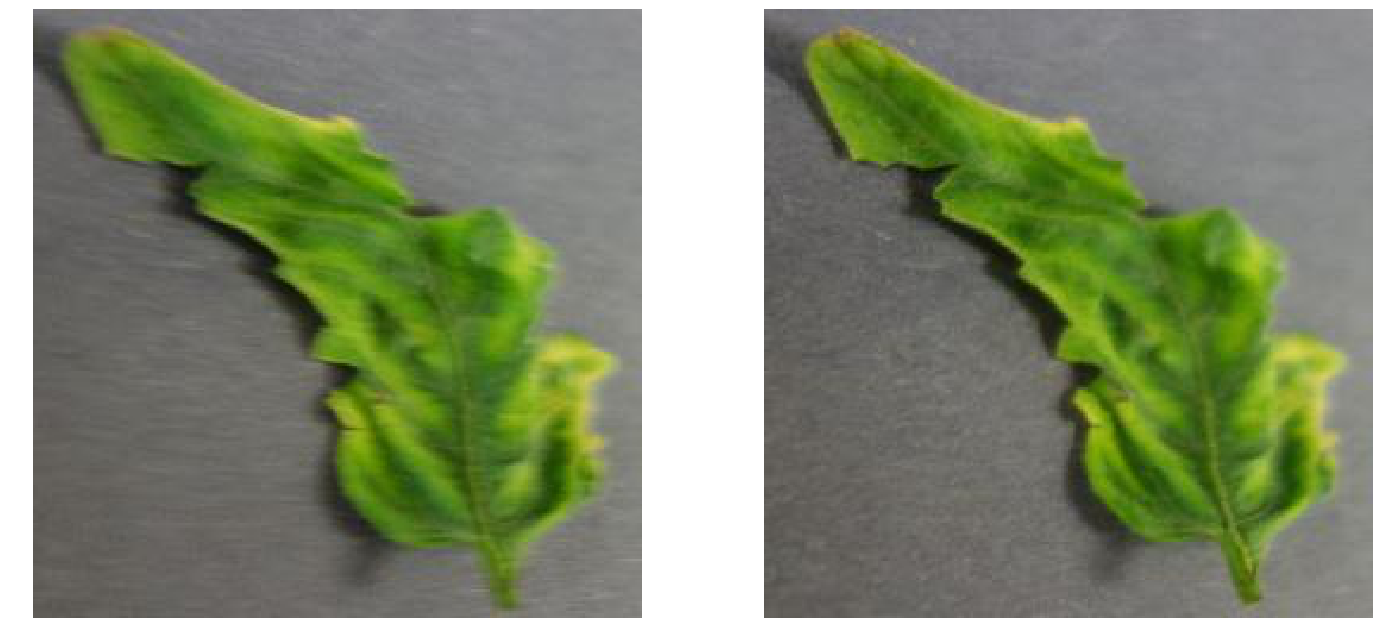

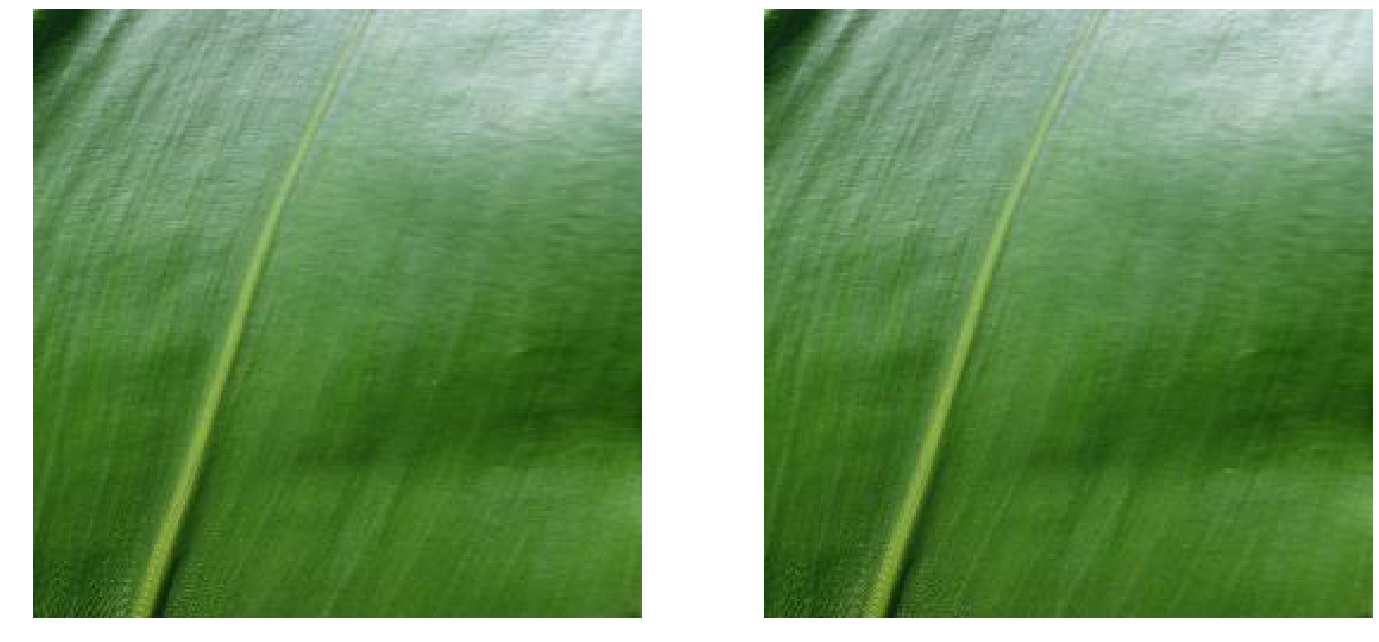

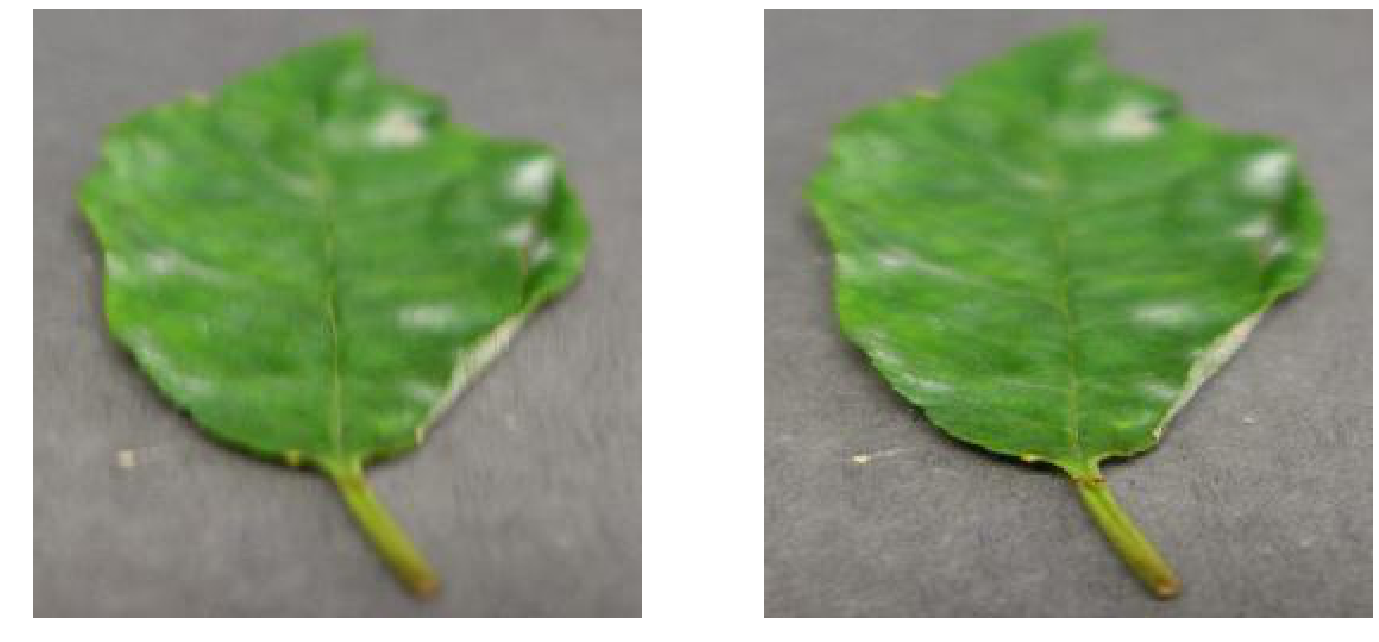

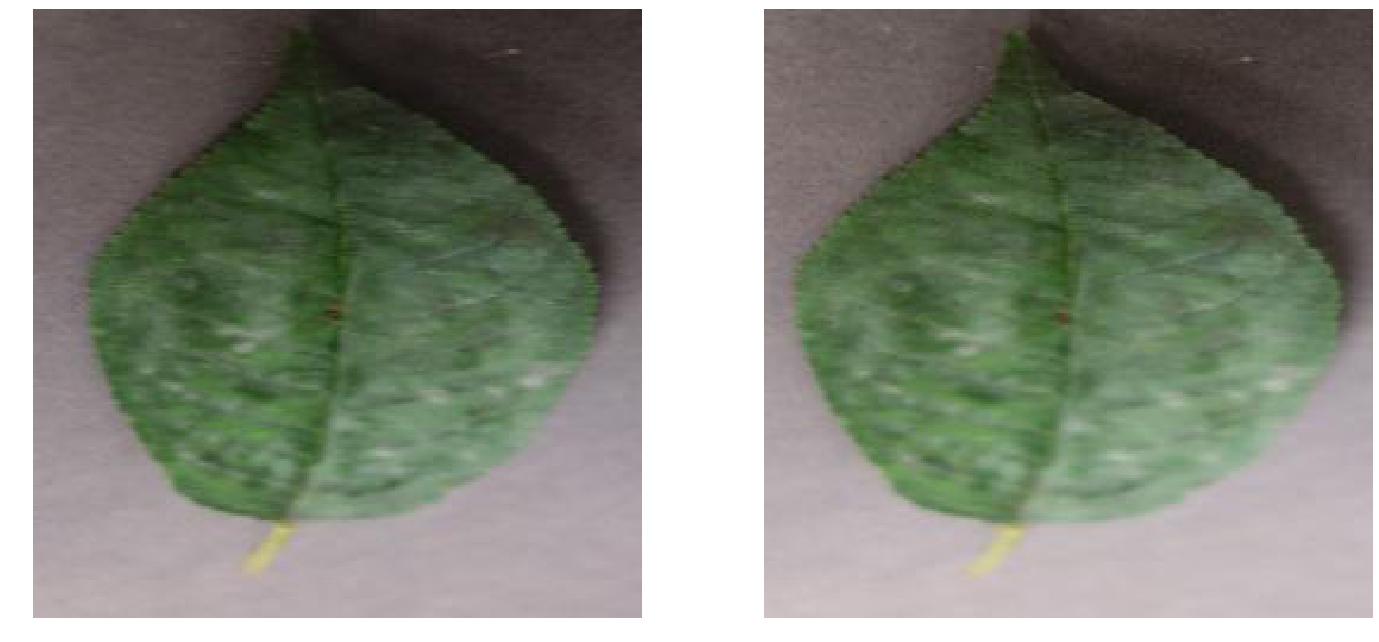

In [10]:
# https://www.kaggle.com/martinpiotte/whale-recognition-model-with-score-0-78563
# with some modifications.

def expand_path(category_path, p):
    if isfile(category_path + '/' + p): 
        return category_path + '/' + p
    return p 


def match(h1, h2, category, category_path):
    for p1 in h2ps[category][h1]:
        for p2 in h2ps[category][h2]:
            i1 =  pil_image.open(expand_path(category_path, p1))
            i2 =  pil_image.open(expand_path(category_path, p2))
            if i1.mode != i2.mode or i1.size != i2.size: return False
            a1 = np.array(i1)
            a1 = a1 - a1.mean()
            a1 = a1/sqrt((a1**2).mean())
            a2 = np.array(i2)
            a2 = a2 - a2.mean()
            a2 = a2/sqrt((a2**2).mean())
            a  = ((a1 - a2)**2).mean()
            if a > 0.1: return False
    return True


def show_duplicates(imgs, per_row=2):
    n         = len(imgs)
    rows      = (n + per_row - 1)//per_row
    cols      = min(per_row, n)
    fig, axes = plt.subplots(rows, cols, figsize=(24//per_row*cols,24//per_row*rows))
    for ax in axes.flatten(): ax.axis('off')
    for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): ax.imshow(img.convert('RGB'))


if os.path.exists(dataset_path):
    category_names = os.listdir(dataset_path)
    p2size = {}
    p2h = {}
    h2ps = {}
    h2h = {}
    duplicates_txt = ""
    for category in category_names:
        category_path = os.path.join(dataset_path, category)
        file_in_category = [name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name))]
        p2size[category] = {}
        for p in file_in_category:
            size = pil_image.open(expand_path(category_path, p)).size
            p2size[category][p] = size
        
        if isfile(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/" + category + "_p2h.pickle"):
            with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/" + category + "_p2h.pickle", 'rb') as f:
                p2h[category] = pickle.load(f)
        else:
            # Compute phash for each image belonging to the same category.
            p2h[category] = {}
            for p in file_in_category:
                img = pil_image.open(expand_path(category_path, p))
                h = phash(img)
                p2h[category][p] = h
            
            # Find all images associated with a given phash value.
            h2ps[category] = {}
            for p,h in p2h[category].items():
                if h not in h2ps[category]: h2ps[category][h] = []
                if p not in h2ps[category][h]: h2ps[category][h].append(p)

            # Find all distinct phash values
            hs = list(h2ps[category].keys())

            # If the images are close enough, associate the two phash values (this is the slow part: n^2 algorithm)
            h2h[category] = {}
            for i,h1 in enumerate(tqdm_notebook(hs, desc=category)):
                for h2 in hs[:i]:
                    if h1-h2 <= 6 and match(h1, h2, category, category_path):
                        s1 = str(h1)
                        s2 = str(h2)
                        if s1 < s2: 
                            s1,s2 = s2,s1
                        h2h[category][s1] = s2

            # Group together images with equivalent phash, and replace by string format of phash (faster and more readable)
            for p,h in p2h[category].items():
                h = str(h)
                if h in h2h[category]: 
                    h = h2h[category][h]
                p2h[category][p] = h
        
            with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/" + category + "_p2h.pickle", 'wb') as f:
                pickle.dump(p2h[category], f)
        
        h2ps[category] = {}
        for p,h in p2h[category].items():
            if h not in h2ps[category]: h2ps[category][h] = []
            if p not in h2ps[category][h]: h2ps[category][h].append(p)
        
        for h, ps in h2ps[category].items():
            if len(ps) >= 2:
                best_p = ps[0]
                best_s = p2size[category][best_p]
                for i in range(1, len(ps)):
                    p = ps[i]
                    s = p2size[category][p]
                    if s[0]*s[1] > best_s[0]*best_s[1]: # Select the image with highest resolution
                        best_p = p
                        best_s = s
                imgs = [pil_image.open(expand_path(category_path,p)) for p in ps]
                show_duplicates(imgs, per_row=len(ps))
                duplicates_txt += category + "\t" + (',').join(ps) + "\t" + best_p + "\n" 
    
    with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/duplicates.txt", 'w') as duplicate_f:
        duplicate_f.write(duplicates_txt)         
else:
    print("Warning: You did not choose any dataset.\n" + "Please try again!")
        

# 将图片集分割成训练集和测试集（不考虑类别不平衡）(Split the database into training set and test set, without consideration of class imbalanced problem)

## 图片集中的图片并非相互独立——某些样本多张图片(Not all of the images are independent, which means more than one image relating to a particular sample)

In [11]:
import glob
import csv
import json
from sklearn.model_selection import GroupKFold

MAP = {}
for csv_file in glob.glob(cwd + "/" + "raw_datasets/csvs/plantVillage_map/*.csv"):
    csv_content = open(csv_file, "r")
    reader = csv.DictReader(csv_content)
    folder_name = csv_file.split("/")[-1].split(".")[0]
    for row in reader:
        file_name = row['File Name'].strip()
        leaf_id = row['Leaf #'].strip()
        value = folder_name + ":::" + leaf_id
        key = folder_name + "/" + file_name
        MAP[key] = value

f=open(cwd + "/" + "processed_datasets/plantVillage/leaf-map-1to1.json", "w")
f.write(json.dumps(MAP))
f.close()

print("The leaf-map-1to1.json file is under " + cwd + "/" + "processed_datasets/plantVillage.")

The leaf-map-1to1.json file is under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage.


In [12]:
leaf_map_1to1 = json.loads(open(cwd + "/" + "processed_datasets/plantVillage/leaf-map-1to1.json", "r").read())

if os.path.exists(dataset_path):
    if isfile(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + "class.txt"):
        with open(cwd + "/" + "processed_datasets/"+ dataset_dropdown.value + "/80-20/" + "class.txt", 'rt') as f:
            labels = f.read().split('\n')[:-1]
            
    index = total_image_number
    splits_counts = 5
    file_absolute_path_groupID = []

    train_path_dependent_unbanance = [[] for i in range(splits_counts)]
    test_path_dependent_unbanance = [[] for i in range(splits_counts)]
    
    category_names = os.listdir(dataset_path)
    for category in category_names:
        category_path = os.path.join(dataset_path, category)
        file_in_category = [name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name))  and 
                                                         (category_path + '/' + name) not in ignored_image_absolute_path]
        
        file_absolute_path_groupID_by_category = []
        image_file_path_by_category = []
        image_label_by_category = []
        image_group_by_category = []
        
        for p in file_in_category:           
            if (category + '/' + p) in leaf_map_1to1.keys():
                group_id = leaf_map_1to1[category + '/' + p]
            else:
                group_id = category + ":::" + str(index)
                leaf_map_1to1[category + '/' + p] = group_id
                index += 1
            file_absolute_path_groupID.append(category_path + '/' + p + '\t' + str(labels.index(category)) + '\t' + group_id)
            file_absolute_path_groupID_by_category.append(category_path + '/' + p + '\t' 
                                                          + str(labels.index(category)) + '\t' + group_id)
            image_file_path_by_category.append(category_path + '/' + p)
            image_label_by_category.append(str(labels.index(category)))
            image_group_by_category.append(group_id)
            
        gkf = GroupKFold(n_splits=splits_counts)
        split_index = 1
        
        for train_index, test_index in gkf.split(image_file_path_by_category, 
                                                 image_label_by_category, 
                                                 groups=image_group_by_category):
            
            for index in train_index:
                train_path_dependent_unbanance[split_index-1].append(file_absolute_path_groupID_by_category[index])
            for index in test_index:
                test_path_dependent_unbanance[split_index-1].append(file_absolute_path_groupID_by_category[index])
            
            split_index += 1
            
    print("There are " + str(len(train_path_dependent_unbanance)) + " splits in cross validation(CV):")
    for i in range(len(train_path_dependent_unbanance)):
        with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
              "train_dependent_unbalance_" + str(i+1) + ".txt", 'w') as f:
            f.write("\n".join(train_path_dependent_unbanance[i]))
            f.write("\n")
        with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
              "test_dependent_unbalance_" + str(i+1) + ".txt", 'w') as f:
            f.write("\n".join(test_path_dependent_unbanance[i]))
            f.write("\n")
        
        print("train/test = ", str((len(train_path_dependent_unbanance[i])+0.0)/
                                   (len(train_path_dependent_unbanance[i])+len(test_path_dependent_unbanance[i]))))
        print("The number of images in train set:", str(len(train_path_dependent_unbanance[i])))
        print("The number of images in test set:", str(len(test_path_dependent_unbanance[i])))
    
    print("The train_dependent_unbalance_*.txt and test_dependent_unbalance_*.txt files are under " + 
          cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/.")
    
else:
    print("Warning: You did not choose any dataset.\n" + "Please try again!")

There are 5 splits in cross validation(CV):
train/test =  0.7996020047169812
The number of images in train set: 43396
The number of images in test set: 10876
train/test =  0.7996941332547169
The number of images in train set: 43401
The number of images in test set: 10871
train/test =  0.7999520931603774
The number of images in train set: 43415
The number of images in test set: 10857
train/test =  0.8002653301886793
The number of images in train set: 43432
The number of images in test set: 10840
train/test =  0.8004864386792453
The number of images in train set: 43444
The number of images in test set: 10828
The train_dependent_unbalance_*.txt and test_dependent_unbalance_*.txt files are under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.


## 图片集中的图片相互独立(All of the images in the dataset are independent)

In [13]:
import random

if os.path.exists(dataset_path):
    if isfile(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + "class.txt"):
        with open(cwd + "/" + "processed_datasets/"+ dataset_dropdown.value + "/80-20/" + "class.txt", 'rt') as f:
            labels = f.read().split('\n')[:-1]
    train_percent = 0.8
    train_path_independent_unbanance = []
    test_path_independent_unbanance = []
    category_names = os.listdir(dataset_path)
    for category in category_names:
        file_absolute_path_in_category = []
        category_path = os.path.join(dataset_path, category)
        file_in_category = [name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name))  and 
                                                         (category_path + '/' + name) not in ignored_image_absolute_path]
        for p in file_in_category:
            file_absolute_path_in_category.append(category_path + '/' + p + '\t' + str(labels.index(category)))
        
        random.shuffle(file_absolute_path_in_category)
        train_path_independent_unbanance.extend(file_absolute_path_in_category[:int(len(file_absolute_path_in_category)*train_percent)])
        test_path_independent_unbanance.extend(file_absolute_path_in_category[int(len(file_absolute_path_in_category)*train_percent):])
    random.shuffle(train_path_independent_unbanance)
    random.shuffle(test_path_independent_unbanance)
    print("train/test = ", str((len(train_path_independent_unbanance)+0.0)/
                               (len(train_path_independent_unbanance)+len(test_path_independent_unbanance))))
    print("The number of images in train set:", str(len(train_path_independent_unbanance)))
    print("The number of images in test set:", str(len(test_path_independent_unbanance)))
    with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
              "train_independent_unbalance.txt", 'w') as f:
        f.write("\n".join(train_path_independent_unbanance))
        f.write("\n")
    with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
              "test_independent_unbalance.txt", 'w') as f:
        f.write("\n".join(test_path_independent_unbanance))
        f.write("\n")  
    print("The train_independent_unbalance.txt file is under " + cwd + "/" + "processed_datasets/" + 
          dataset_dropdown.value + "/80-20/.")
    print("The test_independent_unbalance.txt file is under " + cwd + "/" + "processed_datasets/" + 
          dataset_dropdown.value + "/80-20/.")
else:
    print("Warning: You did not choose any dataset.\n" + "Please try again!")

train/test =  0.7997309846698113
The number of images in train set: 43403
The number of images in test set: 10869
The train_independent_unbalance.txt file is under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.
The test_independent_unbalance.txt file is under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.


# 将图片集分割成训练集和测试集（考虑类别不平衡）(Split the database into training set and test set, with consideration of class imbalanced problem)

## 图片集中的图片并非相互独立——某些样本多张图片(Not all of the images are independent, which means more than one image relating to a particular sample)

In [14]:
if os.path.exists(dataset_path):
    if isfile(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + "class.txt"):
        with open(cwd + "/" + "processed_datasets/"+ dataset_dropdown.value + "/80-20/" + "class.txt", 'rt') as f:
            labels = f.read().split('\n')[:-1]
    file_absolute_path_all = []
    image_number_list = []
    category_names = os.listdir(dataset_path)
    for category in category_names:
        file_absolute_path_in_category = []
        category_path = os.path.join(dataset_path, category)
        file_in_category = [name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name))  and 
                                                         (category_path + '/' + name) not in ignored_image_absolute_path]
        image_number_list.append(len([name for name in os.listdir(category_path) 
                                        if os.path.isfile(os.path.join(category_path, name)) and 
                                                         (category_path + '/' + name) not in ignored_image_absolute_path]))
        for i, p in enumerate(file_in_category):
            file_absolute_path_all.append(str(i) + '\t' + category_path + '/' + p + '\t' + str(labels.index(category)))
else:
    print("Warning: You did not choose any dataset.\n" + "Please try again!")

In [15]:
# L. Shen, et al. Relay Backpropagation for Effective Learning of Deep Convolutional Neural Networks. ECCV, 2016.
# Zhong Q.Y. et al. Towards Good Practices for Recognition & Detection. Hikvision Research Institute. 2016.

import random
from sklearn.model_selection import GroupKFold

start_dependent = 0
end_dependent = 0
selected_oversampling_dependent = []
image_file_path = []
image_label = []
image_group = []

for i in range(len(image_number_list)):
    temp = []
    for j in range(max_image_number):
        temp.append(j)
    random.shuffle(temp)
    for k in range(max_image_number):
        temp[k] = temp[k] % image_number_list[i]
    end_dependent += image_number_list[i]
    file_absolute_path_category = file_absolute_path_groupID[start_dependent:end_dependent]
    start_dependent = end_dependent
    for id in temp:
        item = file_absolute_path_groupID[id]
        path = item.split('\t')[0]
        label = item.split('\t')[1]
        group_id = item.split('\t')[2]
        selected_oversampling_dependent.append(path + '\t' + label + '\t' + group_id)
        image_file_path.append(path)
        image_label.append(label)
        image_group.append(group_id)
        
splits_counts = 5
gkf = GroupKFold(n_splits=splits_counts)
split_index = 1
    
print("There are " + str(splits_counts) + " splits in cross validation(CV):")
for train_index, test_index in gkf.split(image_file_path, image_label, groups=image_group):
    train_path_dependent_banance = []
    test_path_dependent_banance = []
    for index in train_index:
        train_path_dependent_banance.append(selected_oversampling_dependent[index])
    with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
              "train_dependent_balance_" + str(split_index) + ".txt", 'w') as f:
        f.write("\n".join(train_path_dependent_banance))
        f.write("\n")
    for index in test_index:
        test_path_dependent_banance.append(selected_oversampling_dependent[index])
    with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
            "test_dependent_balance_" + str(split_index) + ".txt", 'w') as f:
        f.write("\n".join(test_path_dependent_banance))
        f.write("\n")
        
    print("train/test = ", str((len(train_index)+0.0)/
                                (len(train_index)+len(test_index))))
    print("The number of images in train set:", str(len(train_index)))
    print("The number of images in test set:", str(len(test_index)))
        
    split_index += 1
        
print("The train_dependent_balance_*.txt and test_dependent_balance_*.txt files are under " + 
      cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/.")

There are 5 splits in cross validation(CV):
train/test =  0.7999980864723161
The number of images in train set: 167230
The number of images in test set: 41808
train/test =  0.7999980864723161
The number of images in train set: 167230
The number of images in test set: 41808
train/test =  0.7999980864723161
The number of images in train set: 167230
The number of images in test set: 41808
train/test =  0.800002870291526
The number of images in train set: 167231
The number of images in test set: 41807
train/test =  0.800002870291526
The number of images in train set: 167231
The number of images in test set: 41807
The train_dependent_balance_*.txt and test_dependent_balance_*.txt files are under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.


## 图片集中的图片相互独立(All of the images in the dataset are independent)

In [16]:
# L. Shen, et al. Relay Backpropagation for Effective Learning of Deep Convolutional Neural Networks. ECCV, 2016.
# Zhong Q.Y. et al. Towards Good Practices for Recognition & Detection. Hikvision Research Institute. 2016.

import random

start = 0
end = 0
selected_oversampling = []
train_path_oversampling = []
test_path_oversampling = []
train_percent_oversampling = 0.8

for i in range(len(image_number_list)):
    temp = []
    for j in range(max_image_number):
        temp.append(j)
    random.shuffle(temp)
    for k in range(max_image_number):
        temp[k] = temp[k] % image_number_list[i]
    end += image_number_list[i]
    file_absolute_path_category = file_absolute_path_all[start:end]
    start = end
    for id in temp:
        item = file_absolute_path_category[id]
        path = item.split('\t')[1]
        label = item.split('\t')[2]   
        selected_oversampling.append(path + '\t' + label)

random.shuffle(selected_oversampling)
train_path_oversampling.extend(selected_oversampling[:int(len(selected_oversampling)*train_percent_oversampling)])
test_path_oversampling.extend(selected_oversampling[int(len(selected_oversampling)*train_percent_oversampling):])
random.shuffle(train_path_oversampling)
random.shuffle(test_path_oversampling)
print("train/test = ", str((len(train_path_oversampling)+0.0)/(len(train_path_oversampling)+len(test_path_oversampling))))
print("The number of images in train set:", str(len(train_path_oversampling)))
print("The number of images in test set:", str(len(test_path_oversampling)))
with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
          "train_independent_balance.txt", 'w') as f:
    f.write("\n".join(train_path_oversampling))
    f.write("\n")
with open(cwd + "/" + "processed_datasets/" + dataset_dropdown.value + "/80-20/" + 
          "test_independent_balance.txt", 'w') as f:
    f.write("\n".join(test_path_oversampling))
    f.write("\n")  
print("The train_independent_balance.txt file is under " + cwd + "/" + "processed_datasets/" + 
      dataset_dropdown.value + "/80-20/.")
print("The test_independent_balance.txt file is under " + cwd + "/" + "processed_datasets/" + 
      dataset_dropdown.value + "/80-20/.")

train/test =  0.7999980864723161
The number of images in train set: 167230
The number of images in test set: 41808
The train_independent_balance.txt file is under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.
The test_independent_balance.txt file is under /home/gxty/pycharmProjects/plant_disease_detection_project/processed_datasets/plantVillage/80-20/.
